In [2]:
#ShivanshMishra(GEHU Dehradun)

# Exploratory Data Analysis-Terrorism.

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
import os
warnings.filterwarnings('ignore')

In [68]:
terror=pd.read_csv("data.csv",encoding='ISO-8859-1') #downloaded from kaggle 

In [69]:
terror.tail() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [71]:
terror.shape

(181691, 135)

In [72]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [73]:
# terror.info()
terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','latitude':'Latitude',
                          'longitude':'Longitude','target1':'Target','city':'City'},inplace=True)

In [75]:
# terror.head(5)
#Missing Values:
missing=(((terror.isnull().sum()).sum())/terror.size)*100
missing

56.481718962414206

In [52]:
# terror['Casualties']=terror['Wounded']+terror['Killed']
# 50+% values are Null,lets clean the dataset.
terror = terror[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
terror.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [77]:
for i in terror.columns:
    print(i,terror[i].nunique())

eventid 181691
Year 47
Month 13
Day 32
approxdate 2244
extended 2
resolution 1859
country 205
Country 205
region 12
Region 12
State 2855
City 36674
Latitude 48322
Longitude 48039
specificity 5
vicinity 3
location 44109
summary 112492
crit1 2
crit2 2
crit3 2
doubtterr 3
alternative 5
alternative_txt 5
multiple 2
success 2
suicide 2
attacktype1 9
Attack_Type 9
attacktype2 9
attacktype2_txt 9
attacktype3 8
attacktype3_txt 8
targtype1 22
Target_Type 22
targsubtype1 112
targsubtype1_txt 112
corp1 33238
Target 86006
natlty1 215
natlty1_txt 215
targtype2 22
targtype2_txt 22
targsubtype2 107
targsubtype2_txt 107
corp2 2691
target2 5043
natlty2 158
natlty2_txt 158
targtype3 20
targtype3_txt 20
targsubtype3 92
targsubtype3_txt 92
corp3 422
target3 720
natlty3 110
natlty3_txt 110
Group 3537
gsubname 1183
gname2 433
gsubname2 60
gname3 116
gsubname3 14
motive 14490
guncertain1 2
guncertain2 2
guncertain3 2
individual 2
nperps 113
nperpcap 50
claimed 3
claimmode 10
claimmode_txt 10
claim2 3
claimmo

In [78]:
# Country_top=terror[terror['Country'] != 'Unknown' ]
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [79]:
# Country_type=Country_top['Country'].value_counts().reset_index()
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)

In [80]:
# Country_type.rename(columns={ 'index':'Country','country':'counts'
    
# },inplace=True)
# Country_type
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(53), int32(2), int64(22), object(58)
memory usage: 185.7+ MB


In [81]:
#Cleaned Data
terror.head(10)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [82]:
terror['Attack_Type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

In [83]:
(terror['Attack_Type'].value_counts()/terror.shape[0])*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

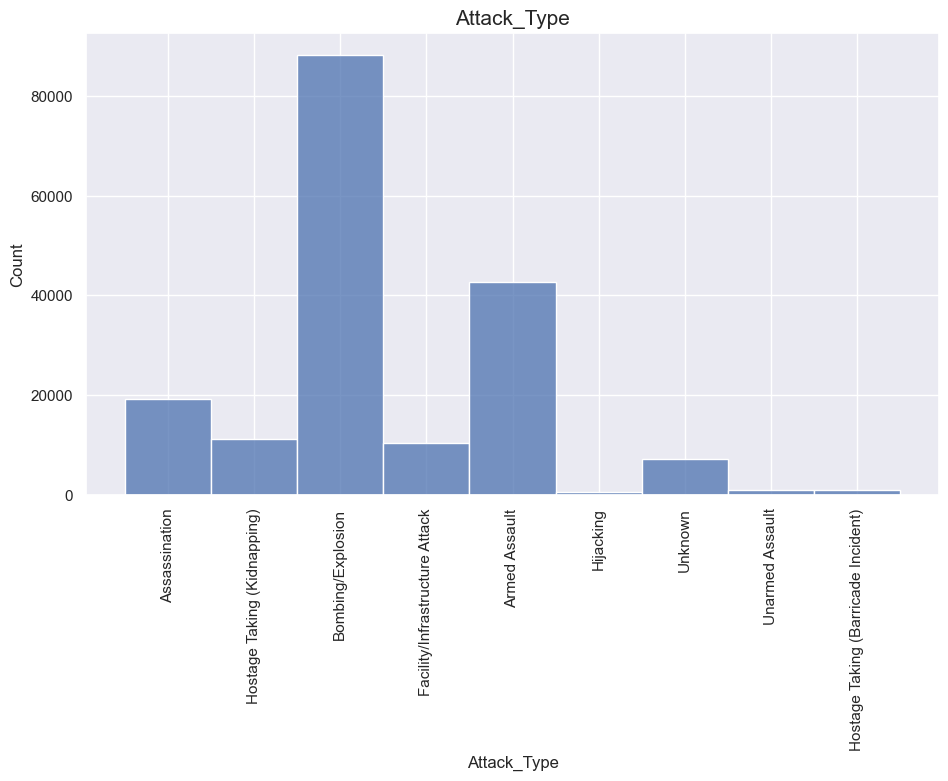

In [84]:
plt.figure(figsize=(11,6))
sns.histplot(terror['Attack_Type'],palette='cubehelix')
plt.title('Attack_Type',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [85]:
terror.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [86]:
plt.figure(figsize=(12, 7))
top_10_countries = terror['Country'].value_counts()[:10]

# Convert the index (country names) to strings
country_names = top_10_countries.index.astype(str)



<Figure size 1200x700 with 0 Axes>

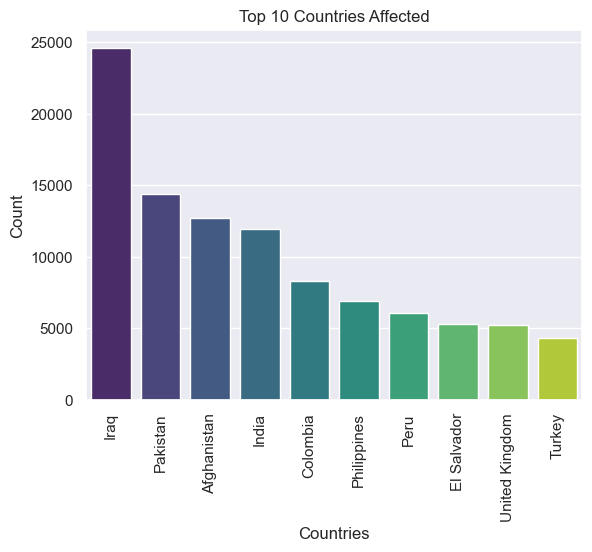

In [87]:
sns.barplot(x=country_names, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [88]:
(terror['Target_Type'].value_counts().head(10)/terror['Target_Type'].shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

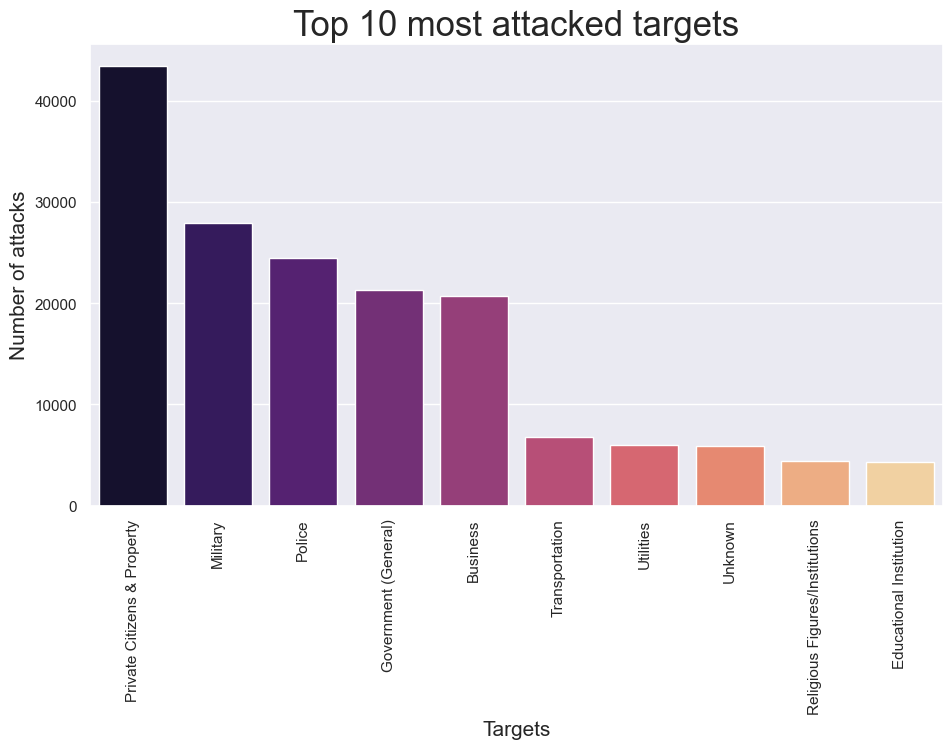

In [66]:
plt.figure(figsize=(11, 6))
target_type_counts = terror['Target_Type'].value_counts().head(10)

# Create the bar plot
sns.barplot(x=target_type_counts.index, y=target_type_counts.values, palette='magma')

# Add labels and title
plt.title('Top 10 most attacked targets', fontsize=25)
plt.xlabel('Targets', fontsize=15)
plt.ylabel('Number of attacks', fontsize=15)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

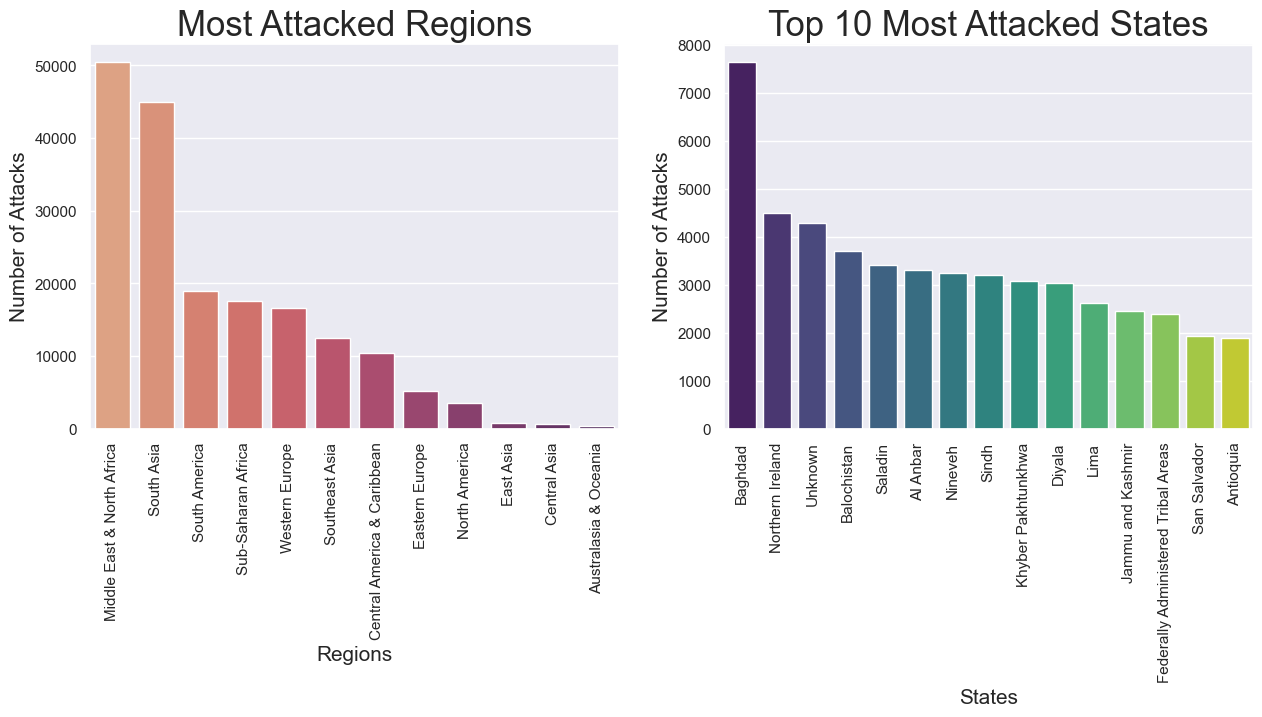

In [89]:
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
region_counts = terror['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette='flare')
plt.title('Most Attacked Regions', fontsize=25)
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)

# Second subplot
plt.subplot(1, 2, 2)
state_counts = terror['State'].value_counts().head(15)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Top 10 Most Attacked States', fontsize=25)
plt.xlabel('States', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)

# Adjust the overall figure size
plt.gcf().set_size_inches(15, 5)

# Show the subplots
plt.show()

In [90]:
(terror['Weapon_type'].value_counts().head()/terror['Weapon_type'].shape[0])*100

Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Name: Weapon_type, dtype: float64

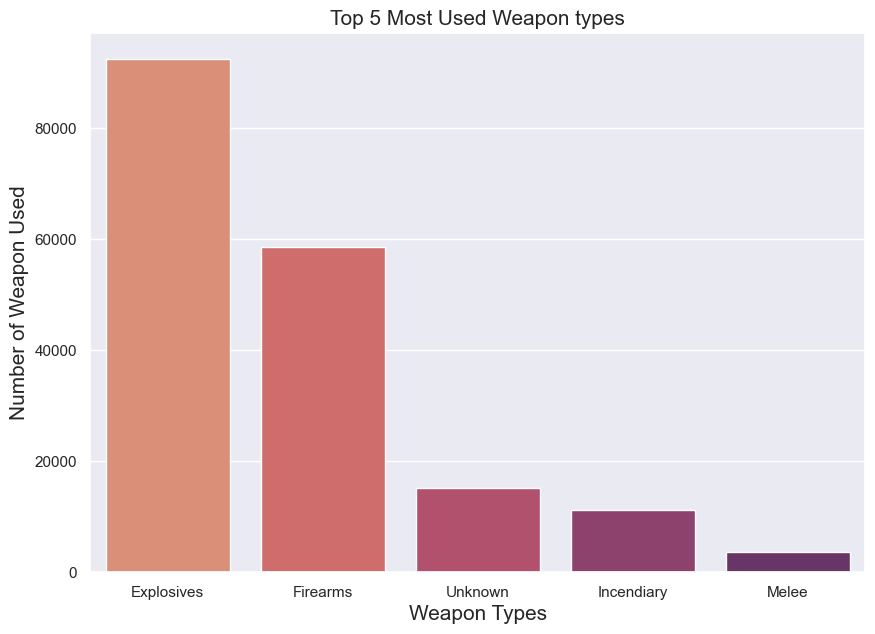

In [25]:
plt.figure(figsize=(10, 7))
weapon_type_counts = terror['Weapon_type'].value_counts().head()

# Create the bar plot
sns.barplot(x=weapon_type_counts.index, y=weapon_type_counts.values, palette='flare')

# Add labels and title
plt.title('Top 5 Most Used Weapon types', fontsize=15)
plt.xlabel('Weapon Types', fontsize=15)
plt.ylabel('Number of Weapon Used', fontsize=15)

# Show the plot
plt.show()

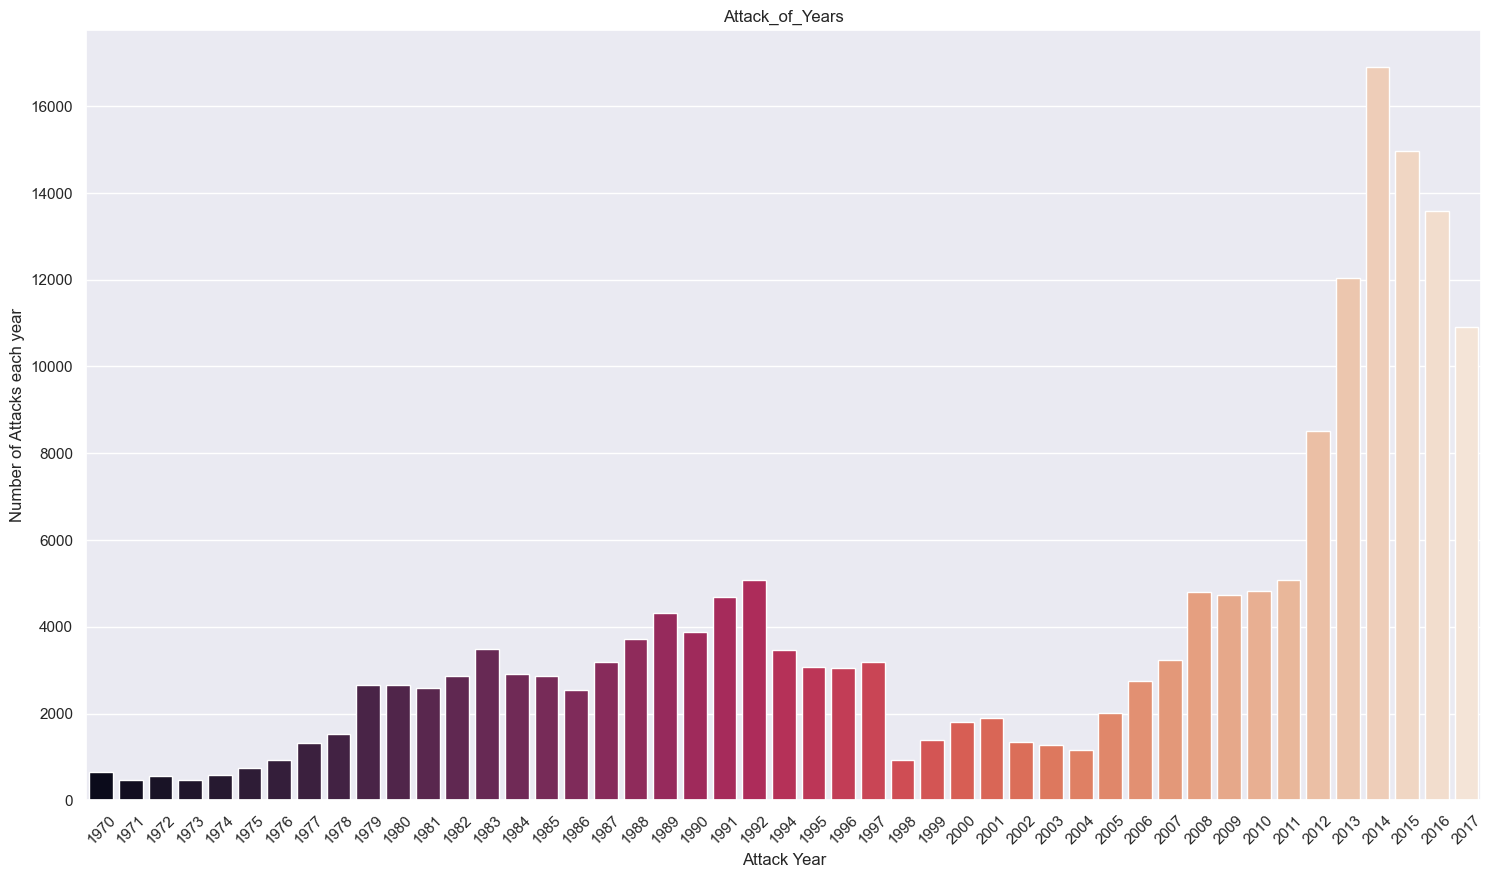

In [91]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()


In [92]:
terror.Country.value_counts()[:15]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

In [93]:
killData = terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [94]:
attackData = terror.loc[:,'Attack_Type']
typeKillData = pd.concat([attackData, killData], axis=1)
#  typeKillData.head()
# print(terror.columns)

In [95]:
typeKillFormatData = typeKillData.pivot_table(columns='Attack_Type', values='Killed', aggfunc='sum')
typeKillFormatData
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 152.0+ bytes


In [96]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [97]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T


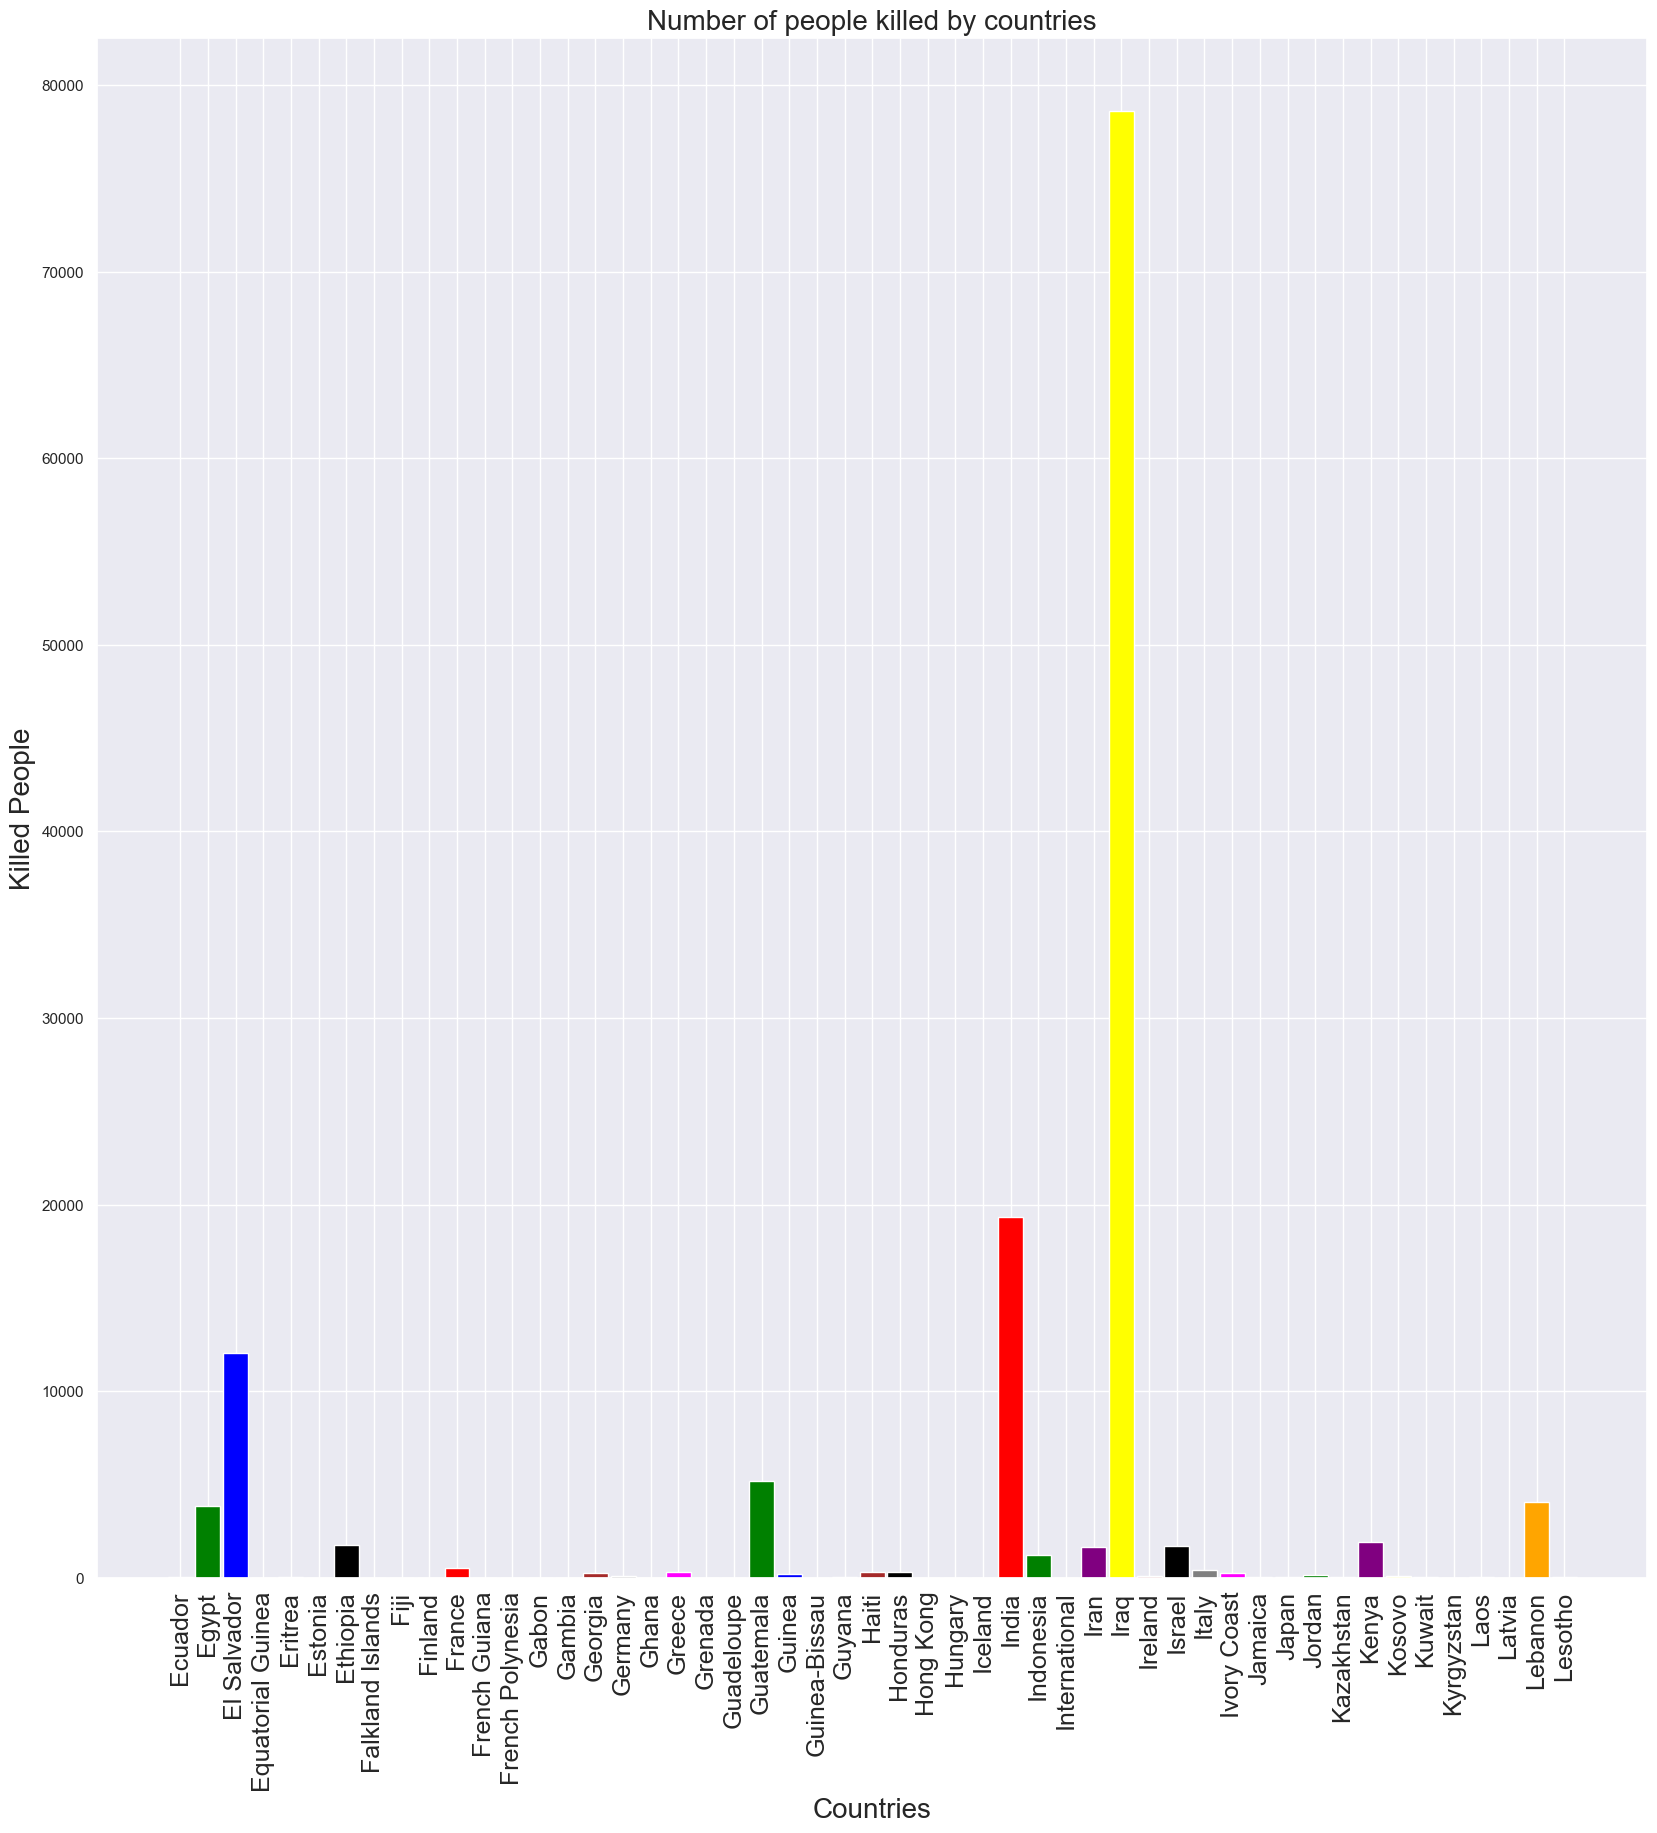

In [95]:
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

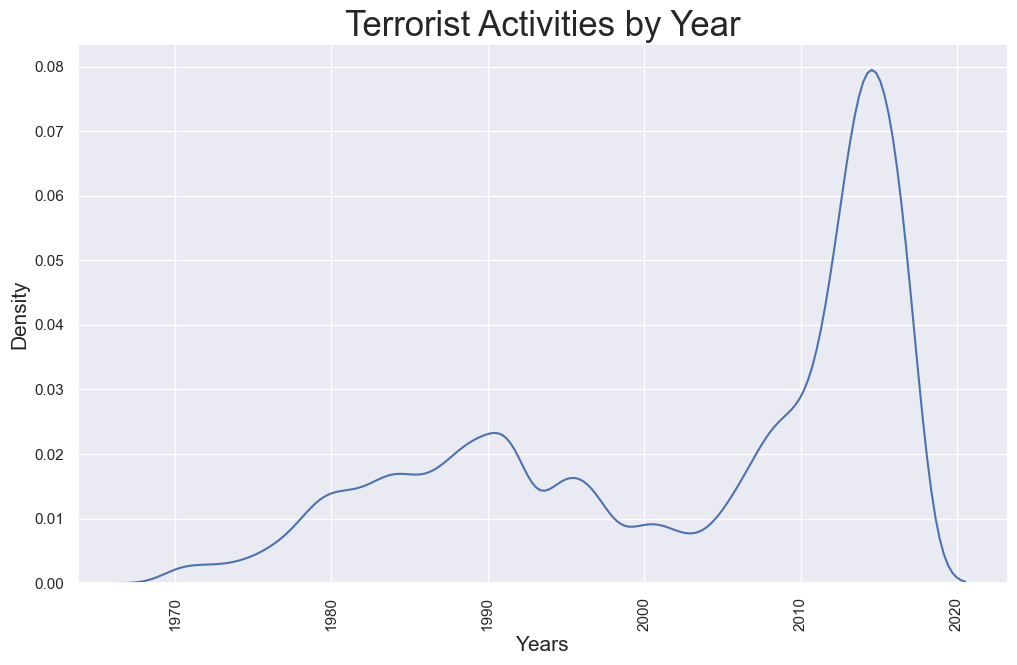

In [98]:
plt.figure(figsize=(12, 7))
sns.kdeplot(terror['Year'])
plt.title('Terrorist Activities by Year', fontsize=25)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xticks(rotation=90)
plt.show()

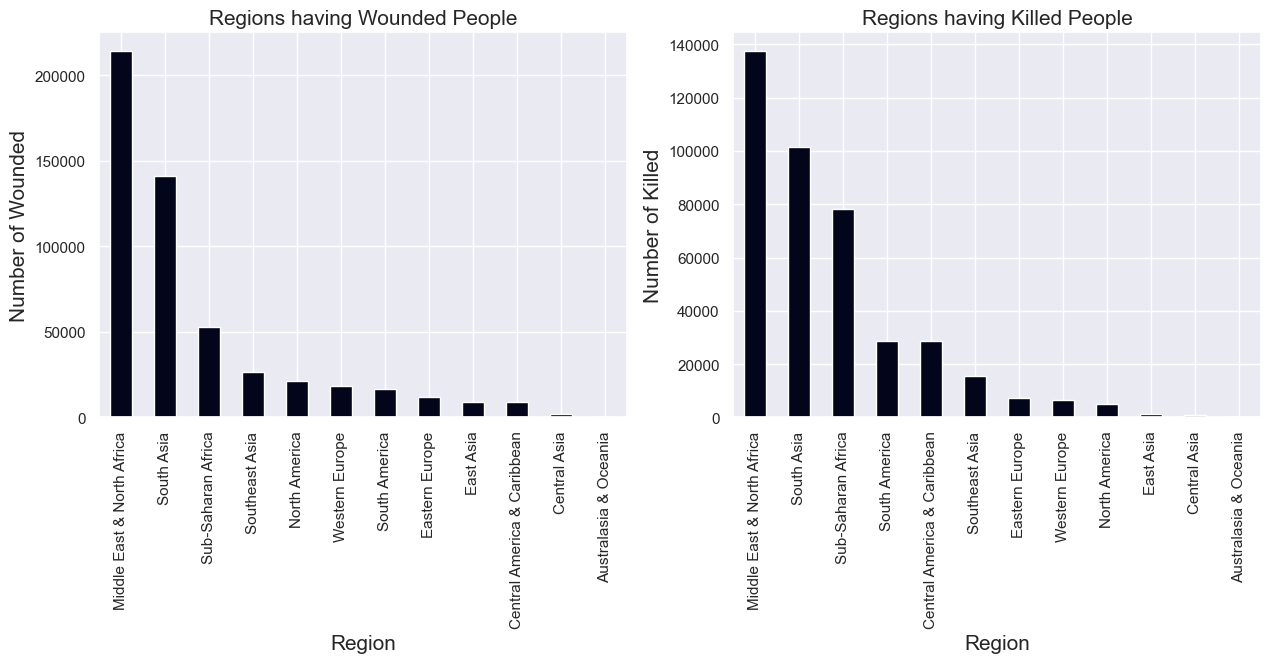

In [99]:
plt.subplot(1,2,1)

terror.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terror.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

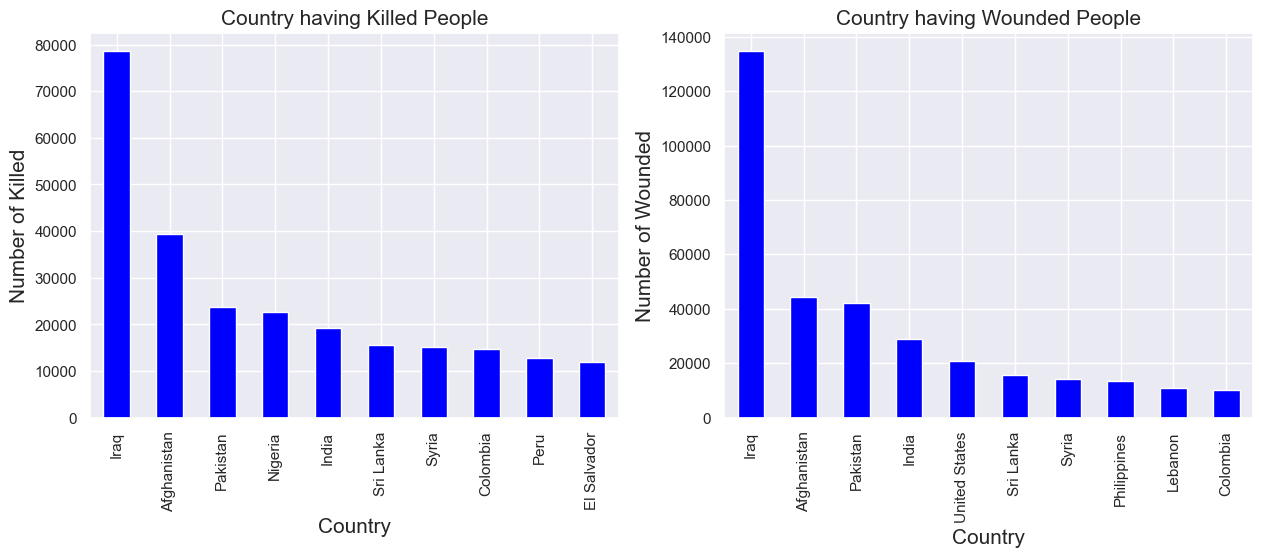

In [99]:
plt.subplot(1,2,2)

df1=terror.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
terror.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

'Iraq' has the most Killed people (>70K) and wounded people (>1.2 lacs) Afganistan, pakistan and India all saw peak deaths while Iraq, which has overtaken all of these at the top of the table, suffered 37,700 more fatalities.

In [100]:
terror_tl = terror[terror.Group == 'Taliban']

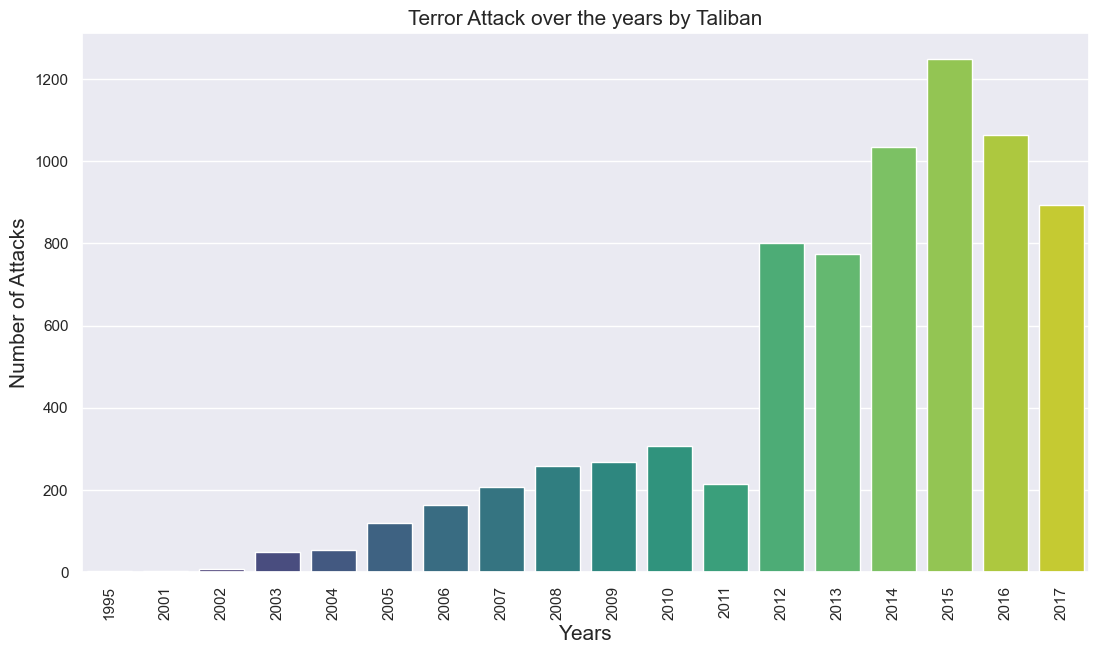

In [36]:
plt.figure(figsize=(13, 7))
terror_tl_year_counts = terror_tl['Year'].value_counts()
sns.barplot(x=terror_tl_year_counts.index, y=terror_tl_year_counts.values, palette='viridis')
plt.title('Terror Attack over the years by Taliban', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [101]:
terr_df_2014 = terror[terror.Year == 2014]

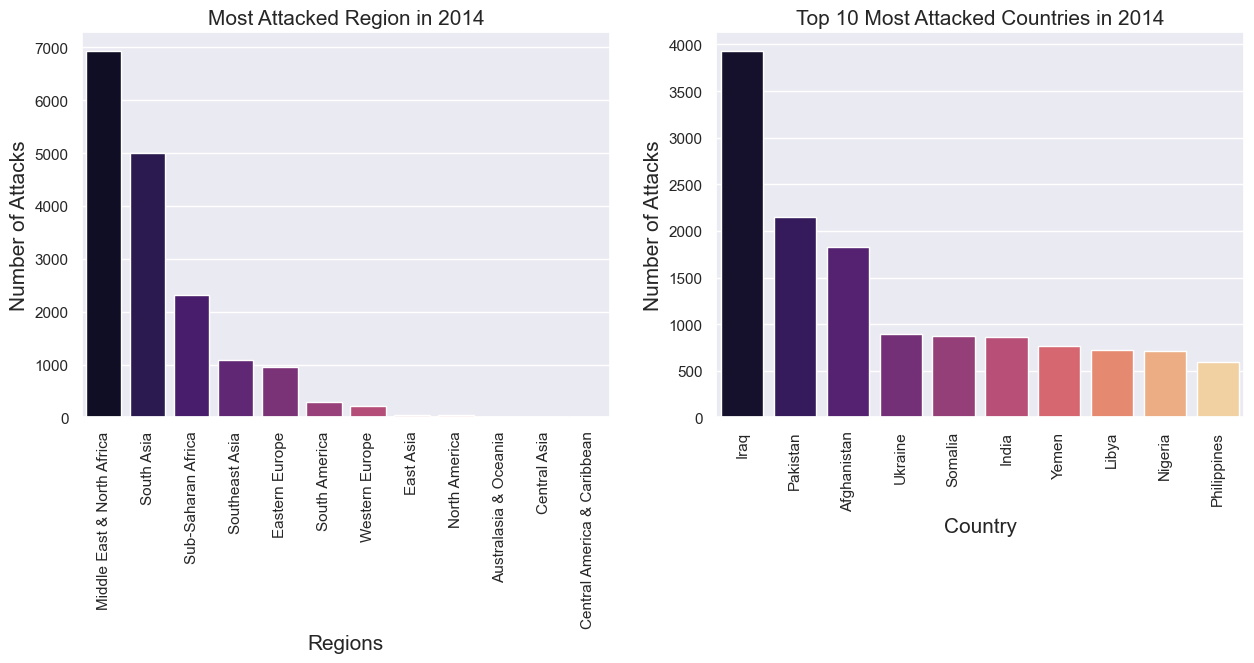

In [102]:
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
region_counts_2014 = terr_df_2014['Region'].value_counts()
sns.barplot(x=region_counts_2014.index, y=region_counts_2014.values, palette='magma')
plt.title('Most Attacked Region in 2014', fontsize=15)
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)

# Second subplot
plt.subplot(1, 2, 2)
country_counts_2014 = terr_df_2014['Country'].value_counts().head(10)
sns.barplot(x=country_counts_2014.index, y=country_counts_2014.values, palette='magma')
plt.title('Top 10 Most Attacked Countries in 2014', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xticks(rotation=90)

# Adjust the overall figure size
plt.gcf().set_size_inches(15, 5)

# Show the subplots
plt.show()

# Conclusion
After performing the Exploratory Data Analysis we get the following insights from the data:

Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
The State and City that was most affected was Baghdad
In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
The most common attack type was Bombing/Explosion.
Explosives have been consistently the most popular weapon of choice for terrorists.
Taliban became more active since 2012 and they are responsible for the most of the terror attacks

*)Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
*)More surveillance is required especially in the Middle East & North African Regions.
*)Strict border policy should be implemented to prevent the movement of explosives between the regions.